In [1]:
# Carregando as bibliotecas
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot


In [2]:
# Carregando o Dataeet
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = read_csv(url, names=names)
print(iris.head(5))



   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Descrição do Dataset

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000



Categorias

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64



BoxPlot



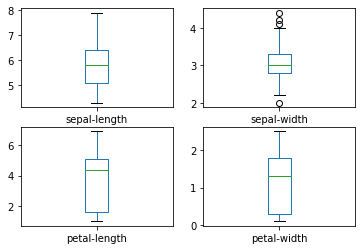

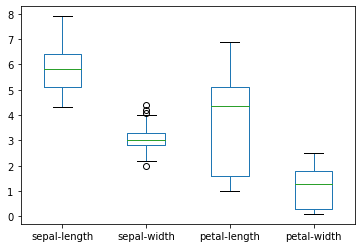

In [3]:
# Conhecendo o Dataeet
print("Descrição do Dataset"+"\n")
print(iris.describe())


print("\n\n\n"+"Categorias\n")
print(iris.groupby('class').size())

print("\n\n\n"+"BoxPlot\n")
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()
iris.plot(kind='box')
pyplot.show()

In [4]:
# DataSet Hot Encoding
iris_encoded = pd.get_dummies(iris['class'])
iris_encoded = pd.concat([iris[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']],iris_encoded],axis=1)
iris_encoded

,sepal-length,sepal-width,petal-length,petal-width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [5]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        feature_type = df[feature_name].dtypes
        if (feature_type == 'float64') or (feature_type == 'int64'):
          max_value = df[feature_name].max()
          min_value = df[feature_name].min()
          result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        else:
          result[feature_name] = df[feature_name] 
    return result

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       0.428704     0.439167      0.467571     0.457778
std        0.230018     0.180664      0.299054     0.317984
min        0.000000     0.000000      0.000000     0.000000
25%        0.222222     0.333333      0.101695     0.083333
50%        0.416667     0.416667      0.567797     0.500000
75%        0.583333     0.541667      0.694915     0.708333
max        1.000000     1.000000      1.000000     1.000000


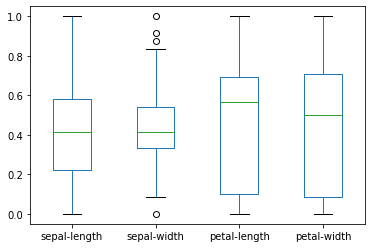

In [6]:
normalized_iris=normalize(iris)

print(normalized_iris.describe())

normalized_iris.plot(kind='box')
pyplot.show()
